In [16]:
import pandas as pd
import os
import librosa

In [17]:
Tess='D:\\Descargas\\genres_original'

In [18]:
tess_directory_list = os.listdir(Tess)
file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + '\\' + dir)
    print(directories)
    for file in directories:
        parts = file.split('.')[0]
        print(parts)
        
        file_emotion.append(parts)
        file_path.append(Tess + '\\' + dir + '\\' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['label'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

['bachata.000.wav', 'bachata.001.wav', 'bachata.002.wav', 'bachata.003.wav', 'bachata.004.wav', 'bachata.005.wav', 'bachata.006.wav', 'bachata.007.wav', 'bachata.008.wav', 'bachata.009.wav', 'bachata.010.wav', 'bachata.011.wav', 'bachata.012.wav', 'bachata.013.wav', 'bachata.014.wav', 'bachata.015.wav', 'bachata.016.wav', 'bachata.017.wav', 'bachata.018.wav', 'bachata.019.wav', 'bachata.020.wav', 'bachata.021.wav', 'bachata.022.wav', 'bachata.023.wav', 'bachata.024.wav', 'bachata.025.wav', 'bachata.026.wav', 'bachata.027.wav', 'bachata.028.wav', 'bachata.029.wav', 'bachata.030.wav', 'bachata.031.wav', 'bachata.032.wav', 'bachata.033.wav', 'bachata.034.wav', 'bachata.035.wav', 'bachata.036.wav', 'bachata.037.wav', 'bachata.038.wav', 'bachata.039.wav', 'bachata.040.wav', 'bachata.041.wav', 'bachata.042.wav', 'bachata.043.wav', 'bachata.044.wav', 'bachata.045.wav', 'bachata.046.wav', 'bachata.047.wav', 'bachata.048.wav', 'bachata.049.wav', 'bachata.050.wav', 'bachata.051.wav', 'bachata.05

,label,Path
0,bachata,D:\Descargas\genres_original\bachata\bachata.0...
1,bachata,D:\Descargas\genres_original\bachata\bachata.0...
2,bachata,D:\Descargas\genres_original\bachata\bachata.0...
3,bachata,D:\Descargas\genres_original\bachata\bachata.0...
4,bachata,D:\Descargas\genres_original\bachata\bachata.0...


In [19]:
Tess_df['label'].value_counts()

bachata      300
blues        300
classical    300
hiphop       300
metal        300
reggae       300
rock         300
salsa        300
vallenato    300
jazz         297
Name: label, dtype: int64

In [20]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [21]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(Tess_df.iterrows()):
    file_name = os.path.join(os.path.abspath(Tess),str(row["Path"]))
    #file_name = os.path.abspath(Tess)+'//'+str(row["Path"])
    final_class_labels=row["label"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

2997it [03:06, 16.09it/s]


In [22]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','label'])
extracted_features_df.head()
# Storing the dataframe to pickle for further processing
extracted_features_df.to_pickle("extracted_df.pkl")
extracted_features_df.head()

,feature,label
0,"[-54.62241, 71.929504, 23.5804, 18.75411, 5.77...",bachata
1,"[-36.594505, 55.615444, 29.520216, 20.43499, 1...",bachata
2,"[-66.82262, 62.132603, 30.28213, 26.68063, 15....",bachata
3,"[-51.882328, 50.86728, 11.996123, 28.19015, 19...",bachata
4,"[-45.693935, 59.754295, 2.6809905, 7.7228317, ...",bachata


In [23]:
final = pd.read_pickle("./extracted_df.pkl")
X = np.array(final["feature"].tolist())
y = np.array(final["label"].tolist())

In [24]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

In [25]:
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=50
)

# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])

Number of training samples =  2397
Number of testing samples =  600


In [27]:

num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(1024, activation="relu", input_shape=(40,)))
ANN_Model.add(Dropout(0.3))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dropout(0.3))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dropout(0.3))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dropout(0.3))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dropout(0.3))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dropout(0.3))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              41984     
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 750)               768750    
_________________________________________________________________
dropout_7 (Dropout)          (None, 750)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               375500    
_________________________________________________________________
dropout_8 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 250)              

In [28]:
ANN_Model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [29]:
num_epochs = 1000
num_batch_size = 30

t0 = time.time()

history = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("Model1.h5")
print("ANN Model Saved")


Epoch 1/1000
80/80 [==============================] - 5s 40ms/step - loss: 4.3044 - accuracy: 0.1269 - val_loss: 2.0939 - val_accuracy: 0.2650
Epoch 2/1000
80/80 [==============================] - 2s 22ms/step - loss: 2.1866 - accuracy: 0.1980 - val_loss: 1.8407 - val_accuracy: 0.3067
Epoch 3/1000
80/80 [==============================] - 2s 22ms/step - loss: 1.9728 - accuracy: 0.2881 - val_loss: 1.7548 - val_accuracy: 0.3167
Epoch 4/1000
80/80 [==============================] - 2s 21ms/step - loss: 1.8608 - accuracy: 0.3116 - val_loss: 1.6204 - val_accuracy: 0.3767
Epoch 5/1000
80/80 [==============================] - 2s 21ms/step - loss: 1.7533 - accuracy: 0.3391 - val_loss: 1.5183 - val_accuracy: 0.3600
Epoch 6/1000
80/80 [==============================] - 2s 25ms/step - loss: 1.6736 - accuracy: 0.3495 - val_loss: 1.4777 - val_accuracy: 0.4517
Epoch 7/1000
80/80 [==============================] - 2s 25ms/step - loss: 1.6276 - accuracy: 0.3821 - val_loss: 1.3366 - val_accuracy: 0.4783

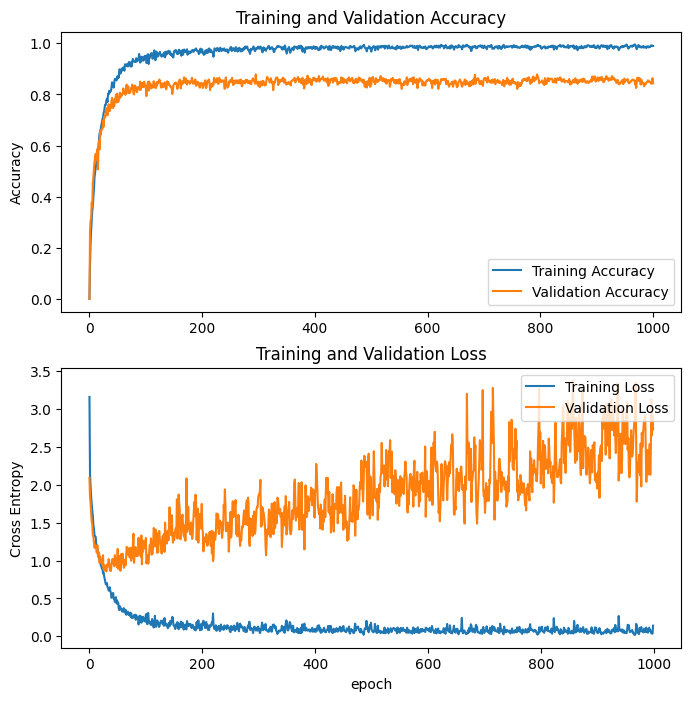

In [30]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()